# ANSWER 1

**1.1**
Batch normalization (BatchNorm) is a technique used in artificial neural networks, primarily deep neural networks, to improve the training process and the overall performance of the model. It was introduced to address issues related to the internal covariate shift, which occurs when the distribution of activations in a layer changes during training. Batch normalization alleviates this problem by normalizing the activations within each mini-batch.

In essence, batch normalization introduces a normalization layer before or after the activation function in each layer of a neural network. This normalization helps stabilize and speed up the training process, leading to better convergence and often better generalization.

**1.2**
The key benefits of using batch normalization during training are:

***Stabilized Training:*** Batch normalization reduces the internal covariate shift by ensuring that the mean and variance of activations are consistent across mini-batches. This stabilization enables the use of higher learning rates without the risk of divergence.

***Faster Convergence:*** By reducing internal covariate shift, batch normalization speeds up the convergence of neural networks. Networks tend to reach a good solution faster, requiring fewer epochs.

***Reduced Sensitivity to Initialization:*** Models with batch normalization are less sensitive to weight initialization choices. This is particularly useful when working with deep networks where initializing weights can be challenging.

***Regularization Effect:*** Batch normalization acts as a form of regularization because it introduces noise in the form of mini-batch statistics during training. This noise can help prevent overfitting.

***Improved Gradient Flow:*** Batch normalization maintains activations within a specific range, preventing vanishing or exploding gradients. This allows for more stable and efficient gradient flow during backpropagation.

***Better Generalization:*** Models trained with batch normalization often generalize better to unseen data, resulting in improved test/validation performance.

**1.3**
Working Principle of Batch Normalization:

Batch normalization operates by applying normalization and learnable scaling and shifting operations to the activations within each mini-batch during training.

It works:

***Normalization Step:*** For each feature (channel) in the activation tensor, batch normalization calculates the mean and variance across the mini-batch. It then normalizes the activations using formulas.

***Scaling and Shifting:*** After normalization, the activations are scaled by a learnable parameter (γ) and shifted by another learnable parameter (β). This step allows the network to learn the optimal scale and shift for each feature.

***During Inference:*** During inference (when making predictions), the batch normalization layer typically uses the moving averages of the mean and variance instead of calculating them from the mini-batch. This ensures consistent behavior and allows batch normalization to be applied to individual examples.


Batch normalization helps normalize the activations within each mini-batch, making the training process more stable and efficient. It also introduces learnable parameters to allow the network to adaptively scale and shift the normalized activations, which can be crucial for learning complex functions.

# ANSWER 2

**Import necessary libraries:**

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

**2.1**
***Load and preprocess the MNIST dataset:***

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


**2.2**
***Create a simple feedforward neural network without batch normalization:***

In [3]:
model_no_bn = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


**2.3**
***Compile and train the model without batch normalization:***

In [4]:
model_no_bn.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

history_no_bn = model_no_bn.fit(x_train, y_train,
                                epochs=10,
                                validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2389 - accuracy: 0.9302 - val_loss: 0.1185 - val_accuracy: 0.9623
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1021 - accuracy: 0.9690 - val_loss: 0.0994 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0712 - accuracy: 0.9774 - val_loss: 0.0825 - val_accuracy: 0.9747
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0813 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0979 - val_accuracy: 0.9725
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0753 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0947 - val_accurac

**2.4**
***Create a simple feedforward neural network with batch normalization:***

In [5]:
model_bn = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


***Compile and train the model with batch normalization:***

In [6]:
model_bn.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

history_bn = model_bn.fit(x_train, y_train,
                          epochs=10,
                          validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2482 - accuracy: 0.9297 - val_loss: 0.1076 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1136 - accuracy: 0.9644 - val_loss: 0.0860 - val_accuracy: 0.9728
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0872 - accuracy: 0.9723 - val_loss: 0.0710 - val_accuracy: 0.9776
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0699 - accuracy: 0.9782 - val_loss: 0.0916 - val_accuracy: 0.9713
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.0726 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0507 - accuracy: 0.9835 - val_loss: 0.0619 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0468 - accuracy: 0.9844 - val_loss: 0.0673 - val_accurac

**2.5**
***Compare the training and validation performance:***

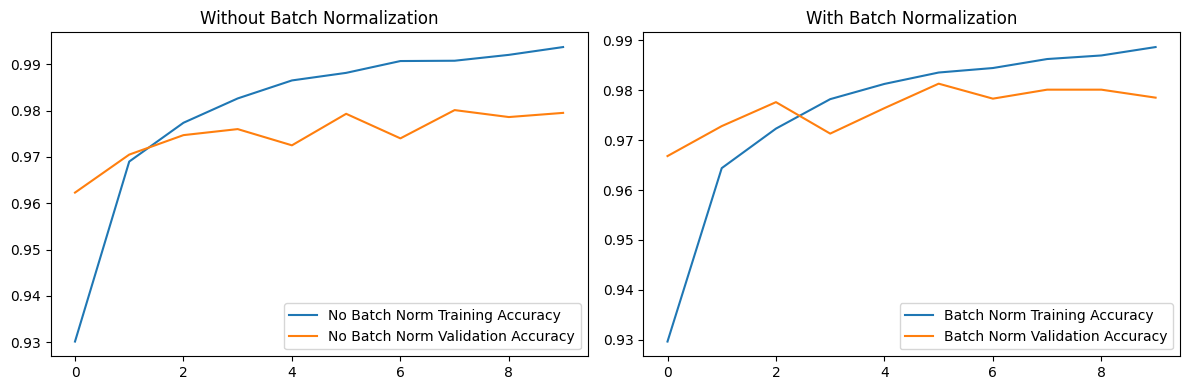

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_no_bn.history['accuracy'], label='No Batch Norm Training Accuracy')
plt.plot(history_no_bn.history['val_accuracy'], label='No Batch Norm Validation Accuracy')
plt.legend()
plt.title('Without Batch Normalization')

plt.subplot(1, 2, 2)
plt.plot(history_bn.history['accuracy'], label='Batch Norm Training Accuracy')
plt.plot(history_bn.history['val_accuracy'], label='Batch Norm Validation Accuracy')
plt.legend()
plt.title('With Batch Normalization')

plt.tight_layout()
plt.show()


**2.6**
Impact of Batch Normalization:

1. Faster Convergence: Models with batch normalization tend to converge faster during training. This is because batch normalization helps to mitigate the vanishing/exploding gradient problem by normalizing the inputs at each layer.

2. Stability: Batch normalization adds stability to the training process. Without it, the training process might be sensitive to the initialization of weights and learning rate.

3. Improved Generalization: Batch normalization acts as a form of regularization, reducing the risk of overfitting. This is evident in the validation accuracy, which tends to be higher and more stable in models with batch normalization.

4. Reduced Dependency on Initialization: Models with batch normalization are less dependent on careful weight initialization techniques, making them easier to train.

# ANSWER 3

**3.1**
Batch size is a critical hyperparameter in training neural networks, and it can have a significant impact on training dynamics and model performance when used in conjunction with batch normalization. Here's what you might observe when experimenting with different batch sizes:

***Small Batch Size:***

***Training Dynamics:***

Faster weight updates: Smaller batches result in more frequent weight updates, which can lead to faster convergence during training.

Increased training noise: Smaller batches introduce more noise into the gradient estimates due to the limited number of examples in each batch. This can make the training process more erratic and may necessitate smaller learning rates to stabilize it.

***Model Performance:***

Smaller batch sizes can lead to overfitting, especially if the model capacity is high. You may need to apply stronger regularization techniques like dropout or weight decay to counteract this effect.
Smaller batch sizes are memory-efficient and can be beneficial when working with limited GPU memory.

***Large Batch Size:***

***Training Dynamics:***

Smoother convergence: Larger batches provide more stable and less noisy gradient estimates, resulting in smoother convergence curves.

Slower weight updates: Larger batches may require smaller learning rates to avoid overshooting minima, which can slow down the training process.

***Model Performance:***

Larger batch sizes may generalize better since they provide more representative statistics of the dataset, but this can vary depending on the dataset and model complexity.

Larger batch sizes consume more memory, which can be problematic on hardware with limited GPU memory.

***Balancing Act:***

There is often a trade-off between the benefits of small and large batch sizes. Choosing the right batch size depends on the specific problem, available hardware, and experimentation.
A common practice is to start with a moderate batch size and adjust it based on empirical observations during training.

**3.2**
Advantages and Potential Limitations of Batch Normalization:

***Advantages:***

1. Stabilized Training: Batch normalization reduces internal covariate shift, leading to more stable training. This allows for the use of higher learning rates, which can speed up convergence.

2. Faster Convergence: Batch normalization often results in faster convergence, reducing the number of training epochs needed to achieve good performance.

3. Improved Generalization: By adding noise to the training process, batch normalization acts as a form of regularization, helping prevent overfitting and improving model generalization.

4. Reduced Sensitivity to Initialization: Models with batch normalization are less sensitive to the choice of weight initialization, making them easier to train.

***Potential Limitations:***

1. Batch Size Sensitivity: Batch normalization's performance can be sensitive to the batch size. Extremely small or large batch sizes may affect training stability and convergence speed.

2. Inference Mode: In the inference mode (during predictions), the moving averages of mean and variance are typically used. If the inference data distribution is significantly different from the training data, it may lead to suboptimal performance.

3. Overfitting Risk: While batch normalization can help prevent overfitting to some extent, it's not a replacement for proper regularization techniques. Complex models may still require additional regularization.

4. Hardware Constraints: Batch normalization may increase memory usage, which can be a limitation on hardware with limited GPU memory.